# Linear Regression Excercises

### Conceptual Challenges

1. Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

![tables 3.4 and 3.5](/2-linear-regression/img/table-3_4-and-3_5.png)

> The null hypotheses to which the p-values given in Table 3.4 correspond are that TV, Radio and Newspaper advertising each have no impact or influence on Sales. 

> Based on the p-values, I can draw the conclusion that there is a very small probability (p-value) that TV and Radio have no impact on Sales. On the other hand, there is a high chance that Newspaper advertising has very little impact on sales.  

2. Carefully explain the differences between the KNN classifier and KNN
regression methods. 

> KNN is a non parametric statistical learning method. Non-parametric statistical methods do not assume or ascribe any shape to the data. 

> KNN classifier is used to predict classes or qualitative data. Given a prediction point, and a value for K, it will estimate the class of the prediction point by assigning to it the class that most of the K observations belong to.

> KNN regression is used to predict numerical or quantitative values.  Given a prediction point and a value for K, it will estimate the value of the prediction point by averaging the value of the K values nearest to the prediction point. 

3. Suppose we have a data set with five predictors, `X1 = GPA`, `X2 = IQ`, `X3 = Level` (1 for College and 0 for High School), `X4 = Interaction between GPA and IQ`, and `X5 = Interaction between GPA and Level`. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 =−10.

    (a) Which answer is correct, and why?

    i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.  
    ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.  
    iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.  
    iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.  

    > The third statement is true. The parameter X3 is a one-hot encoded categorical varable where `college graduate is represented by a value of 1` and `high-school student is represented by a value of 0`. When holding IQ and GPA fixed on average the college student will have a higher salary because the coefficient for X3 is a positive value (35) provided the GPA is low, to minimise the impact of the interaction term between GPA and Level. 

    (b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

    > 87k

    (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

    > False. The coefficient itself being small does not disprove that an interaction effect exists. If the model accuracy improves with the inclusion of the interaction term and the p-value of the interaction term is statistically significant, it is valid to include. 

4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y= β0 + β1X + β2X2 + β3X3 + ϵ.

    (a) Suppose that the true relationship between X and Y is linear, i.e. Y= β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other would we expect them to be the same, or is there not enough information to tell? Justify your answer.  

    > We would expect the linear model to perform better. The cubic model would be unnecessarily squiggly and either overestimate or underestimate the noise in some areas, resulting in a higher RSS.

    (b) Answer (a) using test rather than training RSS.  

    > Because the linear model is a better fit, the training RSS would be lower for the linear model that it would be for the cubic. This is for the same reason that the training RSS would be higher. The model's lower bias in this case does not help to improve accuracy because the true relationship between X and Y is linear. 

    (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

    > There is not enought information to tell. Without knowing the true form of the relationship, it is not easy to determine which model would perform better. It is something that can only be determined through trial and error. 

    (d) Answer (c) using test rather than training RSS.

    > There is not enough information to tell. 

5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form. 

    $$\hat{y_i}=x_i\hat{\beta},$$

    where

    $$\hat{\beta} = \left(\sum_{i=1}^n x_i y_i\right) / \left(\sum_{i'=1}^n x_{i'}^2 \right). $$

    Show that we can write

    $$\hat{y}_i = \sum_{i'=1}^n a_{i'} y_{i'}.$$

    What is $a_{i'}$?

> $$ \hat{y_{i}} = x_{i} \hat{\beta} $$

> $$ \hat{y_{i}} = x_{i}  \left(\sum_{i=1}^n x_i y_i\right) / \left(\sum_{i'=1}^n x_{i'}^2 \right) $$

> $$ \hat{y_{i}} = x_{i}  \left(\sum_{i=1}^n x_i \right) / \left(\sum_{i'=1}^n x_{i'}^2 \right) . y_i $$

> $$ \hat{y_{i}} = x_{i}  \left(\sum_{i=1}^n x_i \right) / \left(\sum_{i'=1}^n x_{i'}^2 \right) . y_i $$


6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point 
($\overline{x}$, $\overline{y}$).

7. It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. For simplicity, you may assume that $\overline{x}$ = $\overline{y}$ = 0.

### Applied Challenges

#### Simple Linear Regression

In [33]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
from statsmodels.stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [ ]:
from ISLP import load_data
from ISLP.models import ( 
    ModelSpec as MS,
    summarize, 
    poly,
)

In [37]:
Auto = load_data('Auto') # Loading "Boston" dataset
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [38]:
Auto.shape

(392, 8)

8. This question involves the use of simple linear regression on the Auto data set.

    (a) Use the `sm.OLS()` function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the `summarize()` function to print the results. 
    
    i. Is there a relationship between the predictor and the response?

    > Yes. the p-value is lower than 0.05
    
    ii. How strong is the relationship between the predictor and the response?
    
    > The relationhsip is not very strong. For every one unit change in horespower, `mpg` decreases by only -0.1578. 

    iii. Is the relationship between the predictor and the response positive or negative?

    >  The relationship is negative 

    iv. What is the predicted mpg associated with a horsepower of 98?

    > 24.46707716

    (b) Plot the response and the predictor in a new set of axesax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

    (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.


In [39]:
y = Auto['mpg']

design = MS(['horsepower'])
X = design.fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 31 May 2025   Prob (F-statistic):           7.03e-81
Time:                        06:31:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

In [40]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
preds = results.get_prediction(newX)
preds.predicted_mean

array([24.46707715])

In [41]:
def abline(ax , b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim, *args, **kwargs)



/var/folders/dt/53bpx70s19ndyhz8nj3phw1h0000gn/T/ipykernel_95730/316620015.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)


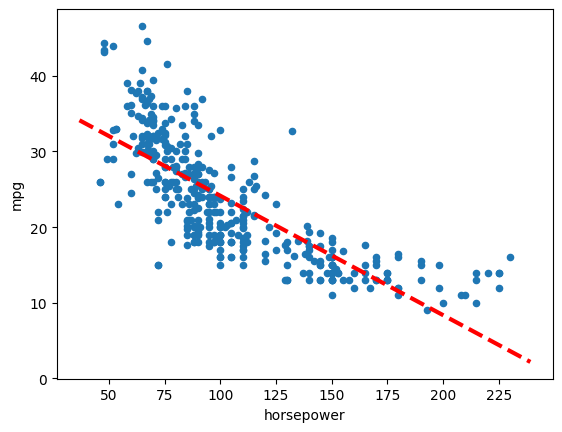

In [42]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)

9. This question involves the use of multiple linear regression on the Auto data set.

    (a) Produce a scatterplot matrix which includes all of the variables in the data set.  

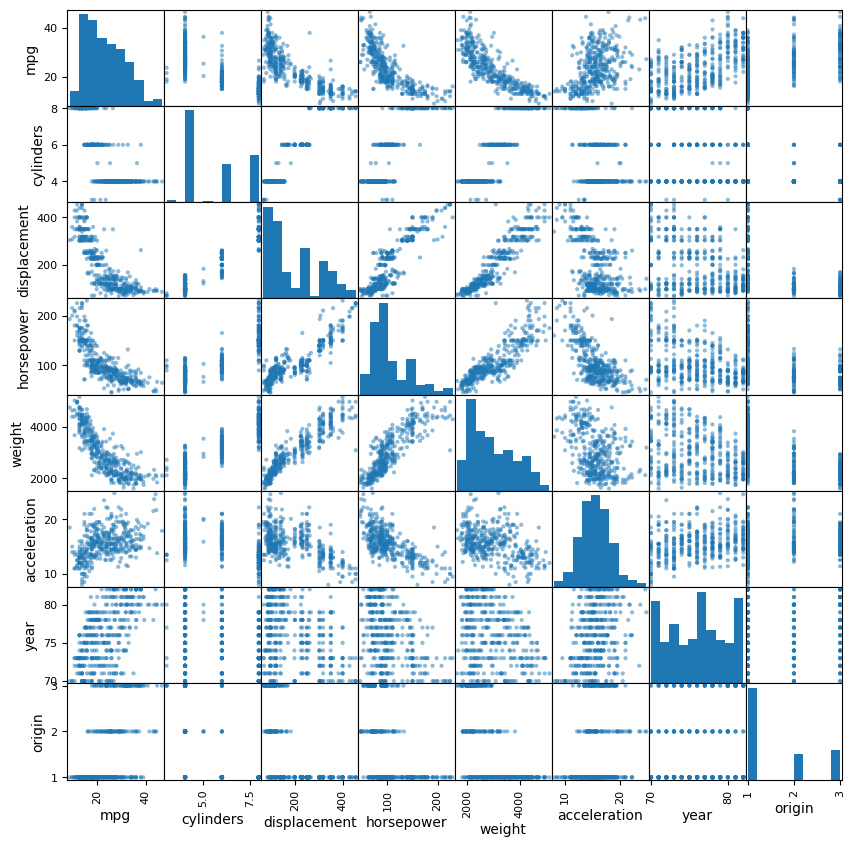

In [ ]:
pd.plotting.scatter_matrix(Auto, figsize=(10, 10));


(b) Compute the matrix of correlations between the variables using the `DataFrame.corr()` method. `.corr()`


In [44]:
auto_corr = Auto.corr()

In [45]:
mask = np.zeros_like(auto_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

auto_corr[mask] = np.nan
(auto_corr
    .style
    .background_gradient(
        cmap='coolwarm', vmin=-1, vmax=1
    )
    .highlight_null(color="#000000DD")
    .format(precision=2)
)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,nan,nan,nan,nan,nan,nan,nan,nan
cylinders,-0.78,nan,nan,nan,nan,nan,nan,nan
displacement,-0.81,0.95,nan,nan,nan,nan,nan,nan
horsepower,-0.78,0.84,0.90,nan,nan,nan,nan,nan
weight,-0.83,0.90,0.93,0.86,nan,nan,nan,nan
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,nan,nan,nan
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,nan,nan
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,nan


(c) Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results.

  i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from statsmodels to answer this question.

  > Yes.

  ii. Which predictors appear to have a statistically significant relationship to the response?

  > All predictors, besides acceleration seem to be related to `mpg`.

  iii. What does the coefficient for the year variable suggest?

  > As the years go by, cars become more feul efficient. 


In [46]:
terms = Auto.columns.drop('mpg', 'name')
y = Auto['mpg']
print(terms.values)

['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration' 'year'
 'origin']


In [84]:
design = MS(terms.values)
X = design.fit_transform(Auto)
model1 = sm.OLS(y, X)
results1 = model1.fit()

print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 31 May 2025   Prob (F-statistic):          2.04e-139
Time:                        12:53:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707   

In [85]:
vals = [VIF(X, i) for i in range (1, X.shape [1])]

vif = pd.DataFrame({'vif ':vals},
index=X.columns [1:])

vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


In [48]:
anova = anova_lm(
    *[
        sm.OLS(y, D).fit() 
        for D in design.build_sequence(
            Auto, anova_type='sequential'
        )
    ]
)
anova.index = design.names

anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
intercept,391.0,23818.993469,0.0,NaN,NaN,NaN
cylinders,390.0,9415.910391,1.0,14403.083079,1300.683788,2.806569e-126
displacement,389.0,8342.566366,1.0,1073.344025,96.929329,1.442524e-20
horsepower,388.0,7939.158297,1.0,403.408069,36.430140,3.700154e-09
weight,387.0,6963.433344,1.0,975.724953,88.113748,5.378297e-19
acceleration,386.0,6962.467273,1.0,0.966071,0.087242,7.678720e-01
year,385.0,4543.347025,1.0,2419.120249,218.460900,1.794078e-39
origin,384.0,4252.212530,1.0,291.134494,26.291171,4.665681e-07


(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

> The `fitted values vs. residuals` plot suggest that the relationship between `mpg` and one or more predictors is non linear.

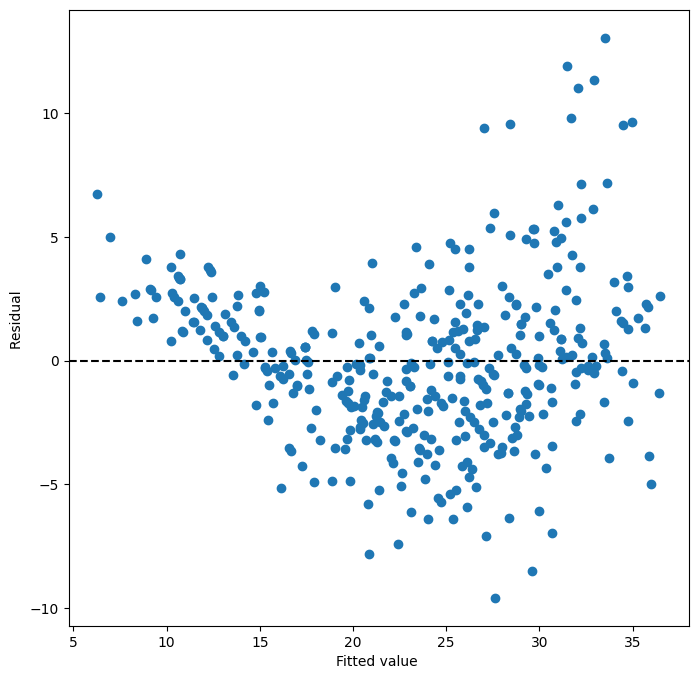

In [49]:
ax = subplots(figsize=(8 ,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
ax. set_xlabel('Fitted value ')
ax. set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--');

np.int64(115)

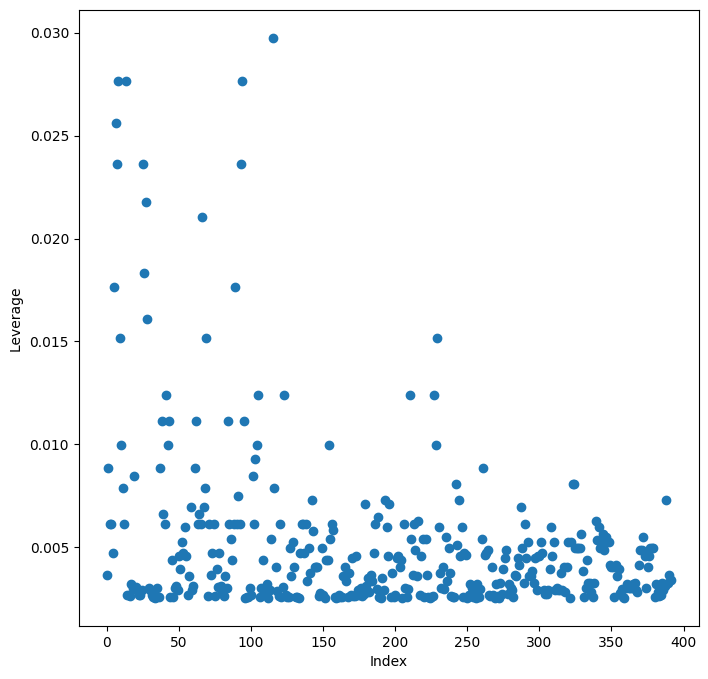

In [50]:
infl = results.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]) , infl.hat_matrix_diag)
ax. set_xlabel('Index')
ax. set_ylabel('Leverage ')
np.argmax(infl.hat_matrix_diag)

In [51]:
def abline(ax , b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim, *args, **kwargs)

/var/folders/dt/53bpx70s19ndyhz8nj3phw1h0000gn/T/ipykernel_95730/316620015.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)


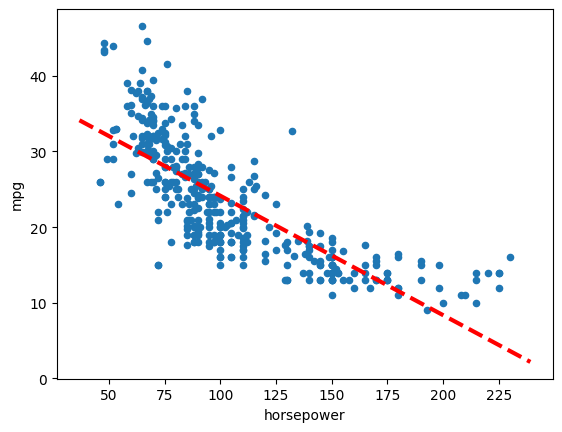

In [54]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)

(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

> The interaction between `acceleration` and `horsepower` is statistically significant.

In [ ]:
interaction = ['horsepower', 'displacement' 'acceleration', 'year', 'origin', ('horsepower', 'acceleration')]

X = MS(interaction).fit_transform(Auto) 
model2 = sm.OLS(y, X)
results2 = model2.fit ()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-31.0495,5.159,-6.019,0.000
horsepower,0.0706,0.022,3.242,0.001
acceleration,0.9085,0.166,5.468,0.000
year,0.7136,0.052,13.616,0.000
origin,2.0020,0.250,8.012,0.000
horsepower:acceleration,-0.0157,0.002,-9.880,0.000


In [98]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     322.0
Date:                Sat, 31 May 2025   Prob (F-statistic):          2.79e-135
Time:                        13:17:12   Log-Likelihood:                -1039.1
No. Observations:                 392   AIC:                             2090.
Df Residuals:                     386   BIC:                             2114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

(f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

> The $X^2$ transformation has a higher RMSE 

In [81]:
polymodel = [poly('horsepower', degree=2), 'weight', 'acceleration', 'year', 'origin']

X = MS(polymodel).fit_transform(Auto) 
model3 = sm.OLS(y, X)
results3 = model3.fit ()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-19.1270,3.696,-5.174,0.000
"poly(horsepower, degree=2)[0]",-51.6403,10.193,-5.066,0.000
"poly(horsepower, degree=2)[1]",34.4470,3.502,9.836,0.000
weight,-0.0034,0.001,-6.810,0.000
acceleration,-0.3123,0.095,-3.292,0.001
year,0.7367,0.046,16.127,0.000
origin,1.0847,0.235,4.618,0.000


In [82]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     377.4
Date:                Sat, 31 May 2025   Prob (F-statistic):          7.57e-158
Time:                        12:35:00   Log-Likelihood:                -983.13
No. Observations:                 392   AIC:                             1980.
Df Residuals:                     385   BIC:                             2008.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     